##
# Previous Codes:
##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
ttn = pd.read_csv('titanic-1hotencoding.csv')
ttn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   sex         891 non-null    int64  
 2   age         891 non-null    int64  
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   adult_male  891 non-null    int64  
 7   alone       891 non-null    int64  
 8   embarked_C  891 non-null    int64  
 9   embarked_Q  891 non-null    int64  
 10  who_child   891 non-null    int64  
 11  who_man     891 non-null    int64  
 12  pclass_1    891 non-null    int64  
 13  pclass_2    891 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.6 KB


In [3]:
input_cols = list(ttn.columns[1:])
target_cols = 'survived'


In [4]:
X = ttn[input_cols]
y = ttn[target_cols]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [7]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [9]:
pd.DataFrame({'Orignal Values' : y_test, 'Predicted Values' : model.predict(X_test)})

,Orignal Values,Predicted Values
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


In [10]:
model.score(X_test, y_test)

0.8171641791044776

###
## Recursive Feature Elimination:
###

In [11]:
from sklearn.feature_selection import RFE

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
model1 = LogisticRegression(max_iter = 1000)
rfe = RFE(estimator = model1, n_features_to_select = 5, verbose = 1)
rfe.fit(X_train, y_train)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5,
    verbose=1)

In [14]:
# this'll show you the selected features

rfe.support_
selected_col = X_train.columns[rfe.support_]

In [15]:
selected_col 

Index(['adult_male', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2'], dtype='object')

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model1 = LogisticRegression(max_iter = 1000)
rfe = RFE(estimator = model1, n_features_to_select = 5, verbose = 1)
rfe.fit(X_train, y_train)
selected_col = X_train.columns[rfe.support_]

model1.fit(X_train[selected_col], y_train)
model1.score(X_test[selected_col], y_test)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


0.7947761194029851

In [17]:
def find_best_feature(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    model1 = LogisticRegression(max_iter = 1000)
    rfe = RFE(estimator = model1, n_features_to_select = n, verbose = 0)
    rfe.fit(X_train, y_train)
    selected_col = X_train.columns[rfe.support_]

    model1.fit(X_train[selected_col], y_train)
    score = model1.score(X_test[selected_col], y_test)
    print('Selected Columns:', list(selected_col))
    print(f'Score: {score * 100:.3f} %')
    print(f'n: {n}')
    print('-' * 50)

In [18]:
for i in range(1, X.shape[1]):
    print(i)
X.shape[1]

1
2
3
4
5
6
7
8
9
10
11
12


13

In [19]:
for i in range(1, X.shape[1] + 1):
    print(f'{i}) ')
    find_best_feature(i)

1) 
Selected Columns: ['who_man']
Score: 79.478 %
n: 1
--------------------------------------------------
2) 
Selected Columns: ['who_man', 'pclass_1']
Score: 79.478 %
n: 2
--------------------------------------------------
3) 
Selected Columns: ['adult_male', 'who_man', 'pclass_1']
Score: 79.478 %
n: 3
--------------------------------------------------
4) 
Selected Columns: ['adult_male', 'who_man', 'pclass_1', 'pclass_2']
Score: 79.478 %
n: 4
--------------------------------------------------
5) 
Selected Columns: ['adult_male', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
Score: 79.478 %
n: 5
--------------------------------------------------
6) 
Selected Columns: ['sibsp', 'adult_male', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
Score: 82.463 %
n: 6
--------------------------------------------------
7) 
Selected Columns: ['sibsp', 'adult_male', 'alone', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
Score: 80.970 %
n: 7
--------------------------------------------------

**Above codes shows us that these values of n are better for our model Accuracy: 8, 9, 10, 11, 12**

##
# accuracy, f1-score, p, r, auc_roc curve part2:
##

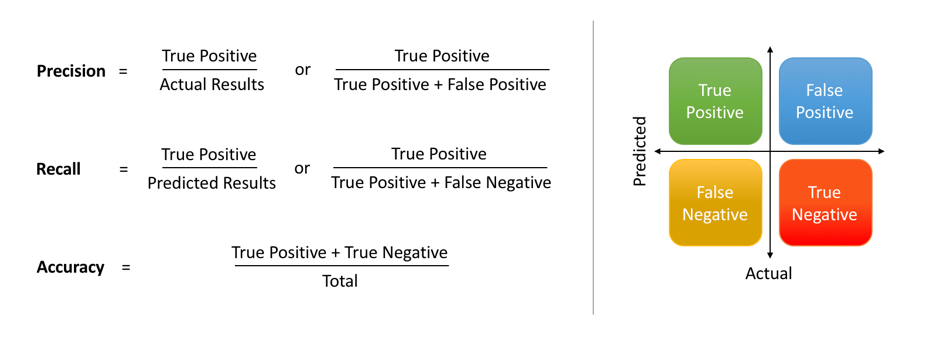

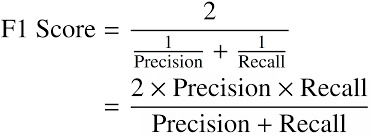

###
**True Positives(TP):** These are the correctly predicted positive values which means that the value of actual class is true and the value of predicted class is also true. 

* If actual class value indicates that this passenger survived and predicted class tells you the same thing.

**True Negatives(TN):** These are the correctly predicted negative values which means that the value of actual class is false and the value of predicted class is also false.

* If actual class says this passenger did not survive and predicted class tells you the same thing.

**False Positive(FP):** When actual class is false and predicted class is true.

* If actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

**Flase Negative(FN):** 

* If actual class says this passenger survive but predicted class tells you that this passenger will die.


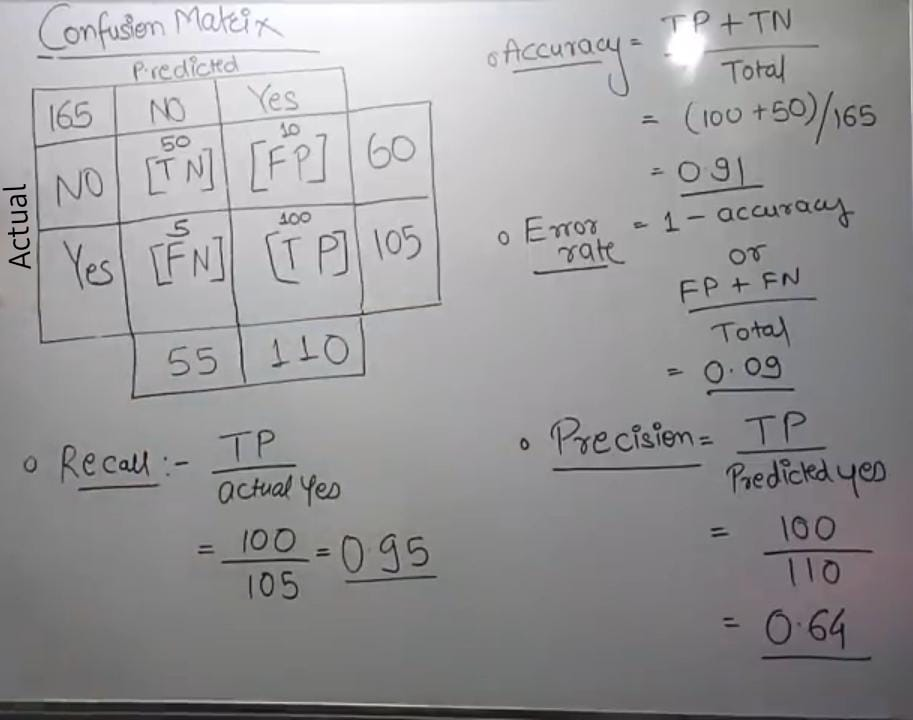

Helpful Link:

* https://youtu.be/AyP85ocS-8Y?si=OuDm7BMXEAiQSdSx

In [20]:
best_features = ['sex', 'age', 'sibsp', 'parch', 'adult_male', 'alone', 'embarked_C', 'embarked_Q', 'who_child', 'who_man', 'pclass_1', 'pclass_2']
len(best_features)

12

In [21]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train[best_features], y_train)
y_predict = model.predict(X_test[best_features])

##
# Part3: 
##

##
# Confusion Matrix:
**A confusion matrix is table that is used to define the performance of a classificaion algorithm**

####

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       157
           1       0.83      0.74      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [25]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm, display_labels = ['Died', 'Survived'])
disp


Passengers Details:

Total Passengers: 268
Passengers died: 157
Passengers alive: 111


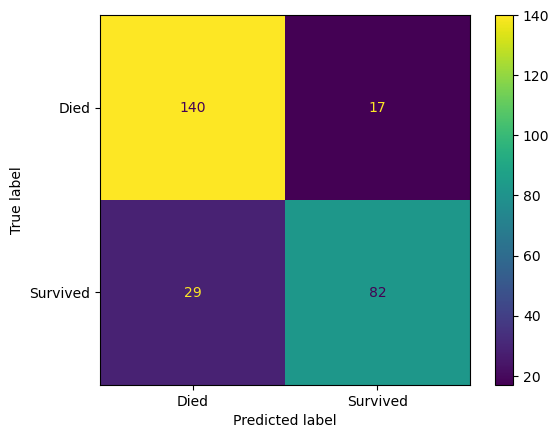

In [26]:
print(disp.plot())
print('\nPassengers Details:\n\nTotal Passengers:',len(X_test[best_features]))
print('Passengers died:',len(y_test[y_test == 0]))
print('Passengers alive:',len(y_test[y_test == 1]))